In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import tweepy
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#script_path = os.path.dirname(os.path.abspath(__file__))
keysFile = open(("keys.txt"), "r")
keys = keysFile.read().splitlines()
keysFile.close()
CONSUMER_KEY = keys[0]
CONSUMER_SECRET = keys[1]
ACCESS_TOKEN = keys[2]
ACCESS_TOKEN_SECRET = keys[3]

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

In [16]:
data = pd.read_csv("my_csv.csv")
data.timestamp = pd.to_datetime(data.timestamp)
def localizeConvert(x):
    x = x.tz_localize('GMT')
    x = x.tz_convert('US/Central')
    return x
data.timestamp = data.timestamp.apply(lambda x: localizeConvert(x))
data.index = data.timestamp
data.drop(columns=['Unnamed: 0','timestamp'],axis=1, inplace=True)

In [4]:
currentPage = -1
friendsList = []
while currentPage != 0:
    pagedList = api.friends(cursor=currentPage)
    currentPage = pagedList[-1][1]
    for x in pagedList:
        for k in x:
            if type(k) is not int:
                friendsList.append(k.name)

temp = pd.DataFrame({'Count' : [len(friendsList), len(data['user'].unique())],
                     'V1' : ['FollowersTotal','FollowersTweeted']})
temp.index = temp['V1']



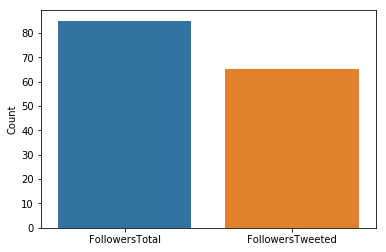

In [5]:
ax = sb.barplot(y='Count',x='V1',data=temp)
ax.set_xlabel('')
plt.show()

In [6]:
list(set(friendsList) - set(data.user.unique()))

['Kansas City EDM Fam',
 'Hans Zimmer',
 'EDMP Discord',
 'SLAVIATHAN',
 'Scotty Does Know',
 'Joel Murphy | b4shful',
 'Canopy',
 'Bandoum',
 'raggs',
 'Maurice  Brown',
 'Tyler, The Creator',
 'ReaperDAW',
 'MMBN Chrono X',
 'Reaper Zone',
 'Future Music',
 '8-bit Music Theory',
 'Frost',
 'Ark Patrol',
 'Phuture Collective',
 'William_Williams',
 'ReaperTV',
 'JunkWub',
 'miho 3tos',
 'Ongaku Concept']

C:\Users\CW056762\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


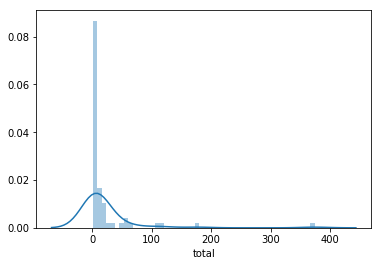

In [7]:
total = data.groupby('user')[data.columns[1:-1]].apply(lambda x: x.sum())

total['total'] = total.sum(axis=1)

total.sort_values(by='total',ascending=False, inplace=True)
sb.distplot(total['total'])

In [8]:
temp = pd.read_csv('my_csv.csv')
#sb.factorplot('timestamp', data=temp.normal)

In [9]:
temp[temp['normal'] is True]

KeyError: False

In [10]:
temp.normal.unique()

array([False])

In [11]:

data.normal.unique()

array([False])

In [17]:
data.tail(20)

,user,retweeted,favorited,quoted,normal,id
timestamp,,,,,,
2018-07-16 07:44:48-05:00,The Kansas City Star,False,True,False,False,1018838862997737472
2018-07-16 07:46:25-05:00,sofia,False,True,True,False,1018839270516129792
2018-07-16 07:51:56-05:00,Adam Neely,True,False,False,False,1018840658944102403
2018-07-16 08:06:01-05:00,Plugin Deals,True,False,False,False,1018844202602582016
2018-07-16 08:09:40-05:00,Calvin and Hobbes,True,False,False,False,1018845118709760001
2018-07-16 08:21:38-05:00,Kansas City Police,True,False,False,False,1018848130513756160
2018-07-16 08:26:02-05:00,The Kansas City Star,True,False,False,False,1018849239097626626
2018-07-16 08:30:03-05:00,Anime News Network,True,False,False,False,1018850249719328770
2018-07-16 08:37:39-05:00,The Kansas City Star,False,True,False,False,1018852163274133507
